# Прогнозирование оттока клиента из банка

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно построить модель с предельно большим значением *F1*-меры. Довести метрику до 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></div>

## Подготовка данных

Импортируем нужные нам библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

Выведим первые 10 строчек датафрейма `df` на экран.

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Выведим количество пропущенных значений для каждого столбца.

In [5]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Пропущенные значения тольько в столбце `Tenure`. Их нужно убрать, иначе модели не будут работать. Заполним их медианными значениями. 

In [6]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

Также удалим признаки, которые не влияют на целевой показатель.

In [7]:
df = df.drop(columns=['Surname', 'CustomerId', 'RowNumber'])

Разобьём данные на три выборки - обучающую, валидационную и тестовую в соотношениии 3:1:1. Для этого разбиения воспользуемся `np.split` и будем работать с индексами

In [11]:
# перемешиваем индексы
idx = np.arange(df.shape[0])
np.random.shuffle(idx)

tr_idx, val_idx, ts_idx = np.split(idx, [round(0.6 * len(idx)), round(0.8 * len(idx))])

Проверим коррректно ли разбились данные с помощью метода `shape`

In [12]:
tr_idx.shape

(6000,)

In [13]:
val_idx.shape

(2000,)

In [14]:
ts_idx.shape

(2000,)

Опрелеим категориальные, числовые колонки, а также целевой признак

In [15]:
cat_cols = ['Geography', 'Gender']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
target_col = 'Exited'

Преобразуем категориальные признаки в численные с помощью One-Hot Encoding

In [16]:
ohe = OneHotEncoder(sparse=False, drop='first').fit(df[cat_cols].iloc[tr_idx])

# применяем метод OneHotEncoder для каждой выборки
ar_tr = ohe.transform(df[cat_cols].iloc[tr_idx])
ar_val = ohe.transform(df[cat_cols].iloc[val_idx])
ar_ts = ohe.transform(df[cat_cols].iloc[ts_idx])

# преобразуем массивы в DataFrame 
x_tr = pd.DataFrame(ar_tr, columns=ohe.get_feature_names(cat_cols), index=df.iloc[tr_idx].index)
x_val = pd.DataFrame(ar_val, columns=ohe.get_feature_names(cat_cols), index=df.iloc[val_idx].index)
x_ts = pd.DataFrame(ar_ts, columns=ohe.get_feature_names(cat_cols), index=df.iloc[ts_idx].index)

# соединим кодировку с основным датасетом
features_train = pd.concat([df[num_cols].iloc[tr_idx], x_tr], axis=1) 
features_valid = pd.concat([df[num_cols].iloc[val_idx], x_val], axis=1)
features_test = pd.concat([df[num_cols].iloc[ts_idx], x_ts], axis=1)

target_train = df[target_col].iloc[tr_idx]
target_valid = df[target_col].iloc[val_idx]
target_test = df[target_col].iloc[ts_idx]

Приведём к одному масштабу количественные признаки с разными разбросами значений

In [17]:
scaler = StandardScaler()

features_train[num_cols] = scaler.fit_transform(features_train[num_cols])
features_valid[num_cols] = scaler.transform(features_valid[num_cols])
features_test[num_cols] = scaler.transform(features_test[num_cols])

## Исследование задачи

Исследуем баланс классов для каждой модели. Для этого найдём F1 score для наилучших моделей.

### Решающее дерево

In [18]:
%%time
best_tree_accuracy = 0
best_depth = 0
best_tree_f1score = 0
best_tree_roc_auc = 0
for depth in range(1, 5):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    accuracy = model.score(features_valid, target_valid)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1_score(target_valid, predicted_valid) > best_tree_f1score:
        best_tree_accuracy = accuracy
        best_depth = depth
        best_tree_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
        best_tree_f1score = f1_score(target_valid, predicted_valid)

print("Accuracy наилучшей модели решающего дерева на валидационной выборке:", best_tree_accuracy)    
print('F1-мера наилучшей модели:', best_tree_f1score)
print('AUC-ROC:', best_tree_roc_auc)
print('Глубина дерева наилучшей модели:', best_depth)

Accuracy наилучшей модели решающего дерева на валидационной выборке: 0.814
F1-мера наилучшей модели: 0.5303030303030303
AUC-ROC: 0.7668270626541864
Глубина дерева наилучшей модели: 3
CPU times: user 52.8 ms, sys: 407 µs, total: 53.2 ms
Wall time: 52.5 ms


### Случайный лес

In [19]:
%%time
best_forest_accuracy = 0
best_forest_f1score = 0
best_forest_roc_auc = 0
best_est_random_forest = 0
best_depth_random_forest = 0
for est in range(5, 20):
    for depth in range(5, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid) 
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1_score(target_valid, predicted_valid) > best_forest_f1score:
            best_forest_accuracy = accuracy 
            best_est_random_forest = est
            best_depth_random_forest = depth
            best_forest_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
            best_forest_f1score = f1_score(target_valid, predicted_valid)
            
print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_forest_accuracy)
print('F1-мера наилучшей модели:', best_forest_f1score)
print('AUC-ROC:', best_forest_roc_auc)
print('Количество деревьев наилучшей модели:', best_est_random_forest)
print('Глубина наилучшей модели:', best_depth_random_forest)

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.841
F1-мера наилучшей модели: 0.533724340175953
AUC-ROC: 0.8043476642582454
Количество деревьев наилучшей модели: 9
Глубина наилучшей модели: 13
CPU times: user 20.7 s, sys: 84 ms, total: 20.8 s
Wall time: 20.8 s


### Логистическая регрессия

Для логистической регрессии выведим соотношение классов. 

In [20]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
accuracy = model.score(features_valid, target_valid)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Accuracy модели логистической регрессии на валидационной выборке:", accuracy)
print('F1-мера модели:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))
print('Соотношение классов:')
print(target_valid.value_counts(normalize=True))

Accuracy модели логистической регрессии на валидационной выборке: 0.7815
F1-мера модели: 0.2040072859744991
AUC-ROC: 0.7402403855458997
Соотношение классов:
0    0.7865
1    0.2135
Name: Exited, dtype: float64


**Вывод:** Наилучшие показатели у модели случайного леса. Поэтому дальнейшее обучение будет проводить на ней. F1-мера - 0.6253602305475505. С помощью балансировки классов попытаемся улучшить этот показатель. 

## Борьба с дисбалансом

Применим некоторые методы по борьбе с дисбалансом 

### Взвешивание классов

In [21]:
%%time
best_forest_accuracy = 0
best_forest_f1score = 0
best_forest_roc_auc = 0
best_est_weight = 0
best_depth_weight = 0
for est in range(5, 20):
    for depth in range(5, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train)
        accuracy = model.score(features_valid, target_valid) 
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        if f1_score(target_valid, predicted_valid) > best_forest_f1score:
            best_forest_accuracy = accuracy 
            best_est_weight = est
            best_depth_weight = depth
            best_forest_f1score = f1_score(target_valid, predicted_valid)
            best_forest_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Accuracy наилучшей модели случайного леса на валидационной выборке с взвешиванием классов:", best_forest_accuracy)
print('F1-мера наилучшей модели:', best_forest_f1score)
print('AUC-ROC:', best_forest_roc_auc)
print('Количество деревьев наилучшей модели:', best_est_weight)
print('Глубина наилучшей модели:', best_depth_weight)

Accuracy наилучшей модели случайного леса на валидационной выборке с взвешиванием классов: 0.813
F1-мера наилучшей модели: 0.5995717344753747
AUC-ROC: 0.832417210211547
Количество деревьев наилучшей модели: 19
Глубина наилучшей модели: 8
CPU times: user 20.9 s, sys: 133 ms, total: 21.1 s
Wall time: 21.1 s


### Увеличение выборки

In [22]:
%%time
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
            
best_forest_accuracy = 0
best_forest_f1score = 0
best_forest_roc_auc = 0
best_est_upsample = 0
best_depth_upsample = 0
best_repeat_upsample = 0

for est in range(20, 30):
    for depth in range(5, 10):
        for repeat in range(2, 5):
            features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
            model.fit(features_upsampled, target_upsampled)
            accuracy = model.score(features_valid, target_valid) 
            predicted_valid = model.predict(features_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            if f1_score(target_valid, predicted_valid) > best_forest_f1score:
                best_forest_accuracy = accuracy 
                best_est_upsample = est
                best_depth_upsample = depth
                best_repeat_upsample = repeat
                best_forest_f1score = f1_score(target_valid, predicted_valid)
                best_forest_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

            
print("Accuracy наилучшей модели случайного леса на валидационной выборке с увеличением выборки:", best_forest_accuracy)
print('F1-мера наилучшей модели:', best_forest_f1score)
print('AUC-ROC:', best_forest_roc_auc)
print('Количество деревьев наилучшей модели:', best_est_upsample)
print('Глубина наилучшей модели:', best_depth_upsample)
print('Repeat наилучшей модели:', best_repeat_upsample)

Accuracy наилучшей модели случайного леса на валидационной выборке с увеличением выборки: 0.818
F1-мера наилучшей модели: 0.5964523281596452
AUC-ROC: 0.8313541897744579
Количество деревьев наилучшей модели: 26
Глубина наилучшей модели: 7
Repeat наилучшей модели: 3
CPU times: user 25.8 s, sys: 188 ms, total: 26 s
Wall time: 26 s


### Уменьшение выборки

In [23]:
%%time
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

best_forest_accuracy = 0
best_forest_f1score = 0
best_forest_roc_auc = 0
best_est = 0
best_depth = 0
best_frac = 0
for est in range(10, 20):
    for depth in range(5, 10):
        for frac in np.arange(0.1, 0.5, 0.05):
            features_downsampled, target_downsampled = downsample(features_train, target_train, frac)
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
            model.fit(features_downsampled, target_downsampled)
            accuracy = model.score(features_valid, target_valid) 
            predicted_valid = model.predict(features_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            if f1_score(target_valid, predicted_valid) > best_forest_f1score:
                best_forest_accuracy = accuracy 
                best_est = est
                best_depth = depth
                best_frac = frac
                best_forest_f1score = f1_score(target_valid, predicted_valid)
                best_forest_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
            
print("Accuracy наилучшей модели случайного леса на валидационной выборке с уменьшением выборки:", best_forest_accuracy)
print('F1-мера наилучшей модели:', best_forest_f1score)
print('AUC-ROC:', best_forest_roc_auc)
print('Количество деревьев наилучшей модели:', best_est)
print('Глубина наилучшей модели:', best_depth)
print('Fraction наилучшей модели:', best_frac)

Accuracy наилучшей модели случайного леса на валидационной выборке с уменьшением выборки: 0.8205
F1-мера наилучшей модели: 0.5906499429874573
AUC-ROC: 0.8271430506899956
Количество деревьев наилучшей модели: 18
Глубина наилучшей модели: 9
Fraction наилучшей модели: 0.40000000000000013
CPU times: user 24.9 s, sys: 188 ms, total: 25.1 s
Wall time: 25.2 s


**Вывод:** Все методы помогли улучшить показатель F1 Score. Увеличение выборки немного значительнее улучшила этот показатель.

## Тестирование модели

Обучим наилучшую модель случайного леса на тестовой выборке с увеличением выборки.

In [24]:
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])
features_upsampled, target_upsampled = upsample(features_train_valid, target_train_valid, best_repeat_upsample)
model = RandomForestClassifier(random_state=12345, n_estimators=best_est_upsample, max_depth=best_depth_upsample) 
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Accuracy:', model.score(features_test, target_test))
print('F1-мера:', f1_score(target_test, predicted_test))

Accuracy: 0.8215
F1-мера: 0.6081229418221735


Нарисуем ROC-кривую и посчитаем площадь под ней - AUC-ROC. 

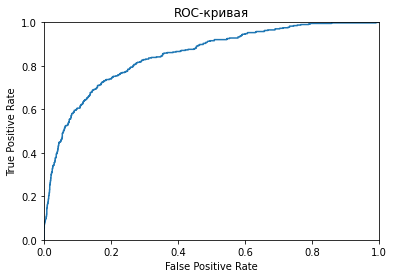

In [25]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [26]:
roc_auc_score(target_test, probabilities_one_test)

0.8484448974581683

**Вывод:** Удалось достичь F1-меры не менее 0.59. AUC-ROC получилось больше 0.5, что говорит нам о том, что наша модель довольно сильно отличается от случайной модели. А график ROC-кривой расположен достаточно высоко, значит качество модели хорошее.